In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
codf = pd.read_excel('covid_19_india.xlsx')

In [4]:
codf

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,18:00:00,Kerala,1,0,0,0,1
1,2,2020-01-31,18:00:00,Kerala,1,0,0,0,1
2,3,2020-02-01,18:00:00,Kerala,2,0,0,0,2
3,4,2020-02-02,18:00:00,Kerala,3,0,0,0,3
4,5,2020-02-03,18:00:00,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,08:00:00,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,08:00:00,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,08:00:00,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,08:00:00,Uttar Pradesh,-,-,1685492,22775,1708812


In [5]:
codf.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,18:00:00,Kerala,1,0,0,0,1
1,2,2020-01-31,18:00:00,Kerala,1,0,0,0,1
2,3,2020-02-01,18:00:00,Kerala,2,0,0,0,2
3,4,2020-02-02,18:00:00,Kerala,3,0,0,0,3
4,5,2020-02-03,18:00:00,Kerala,3,0,0,0,3


In [6]:
codf.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,08:00:00,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,08:00:00,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,08:00:00,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,08:00:00,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,08:00:00,West Bengal,-,-,1506532,18252,1534999


In [7]:
codf.shape

(18110, 9)

In [8]:
codf.size

162990

In [9]:
codf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


In [10]:
codf.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [11]:
codf.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [13]:
states = codf['State/UnionTerritory'].unique()

In [14]:
states

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

In [17]:
for state in states:
    deaths = codf[codf['State/UnionTerritory']==state].sum()
    print(f"The death happened in {state} : {deaths}")

The death happened in Kerala : Sno                                                               4592125
State/UnionTerritory    KeralaKeralaKeralaKeralaKeralaKeralaKeralaKera...
Cured                                                           420174235
Deaths                                                            1888177
Confirmed                                                       458906023
dtype: object
The death happened in Telengana : Sno                                                               2937495
State/UnionTerritory    TelenganaTelenganaTelenganaTelenganaTelenganaT...
Cured                                                            64666267
Deaths                                                             400427
Confirmed                                                        69990668
dtype: object
The death happened in Delhi : Sno                                                               4587532
State/UnionTerritory    DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelh

In [18]:
codf

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,18:00:00,Kerala,1,0,0,0,1
1,2,2020-01-31,18:00:00,Kerala,1,0,0,0,1
2,3,2020-02-01,18:00:00,Kerala,2,0,0,0,2
3,4,2020-02-02,18:00:00,Kerala,3,0,0,0,3
4,5,2020-02-03,18:00:00,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,08:00:00,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,08:00:00,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,08:00:00,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,08:00:00,Uttar Pradesh,-,-,1685492,22775,1708812


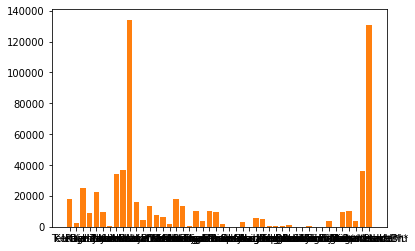

In [21]:
x = codf['State/UnionTerritory']
y = codf['Deaths']

plt.bar(x,y)
plt.show()

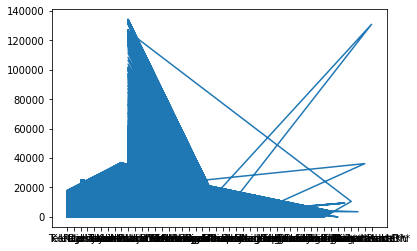

In [22]:
x = codf['State/UnionTerritory']
y = codf['Deaths']

plt.plot(x,y)
plt.show()

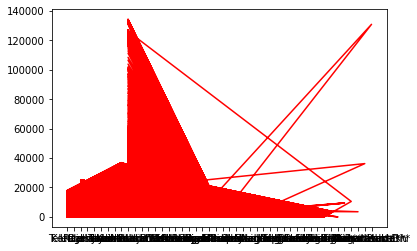

In [26]:
x = codf['State/UnionTerritory']
y = codf['Deaths']

plt.plot(x,y,'red')
plt.show()

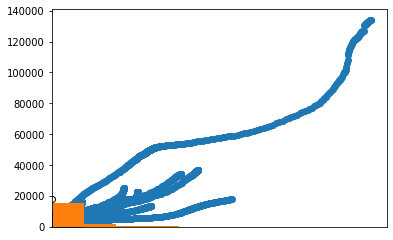

In [30]:
plt.hist(codf['Confirmed'])
plt.show()

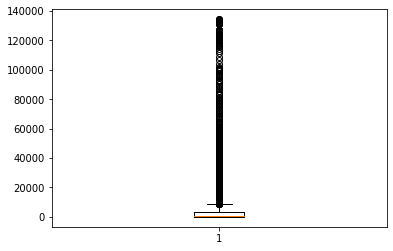

In [31]:
plt.boxplot(codf['Deaths'])
plt.show()

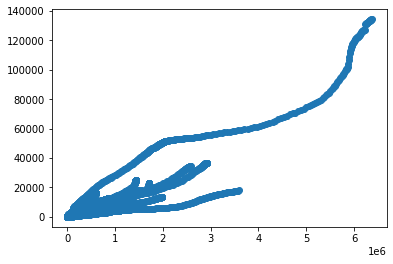

In [32]:
plt.scatter(codf['Confirmed'], codf['Deaths'])
plt.show()

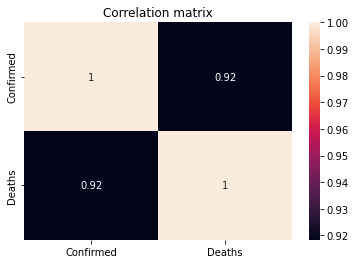

In [35]:
import seaborn as sns

corr_matrix = codf[['Confirmed','Deaths']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix')
plt.show()

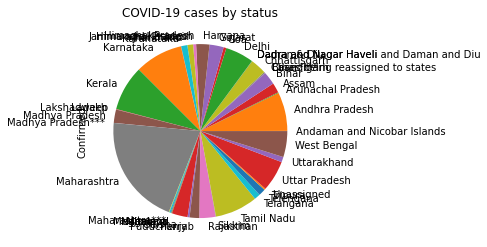

In [38]:
codf.groupby('State/UnionTerritory')['Confirmed'].sum().plot(kind='pie')
plt.title('COVID-19 cases by status')
plt.show()

In [39]:
codf

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,18:00:00,Kerala,1,0,0,0,1
1,2,2020-01-31,18:00:00,Kerala,1,0,0,0,1
2,3,2020-02-01,18:00:00,Kerala,2,0,0,0,2
3,4,2020-02-02,18:00:00,Kerala,3,0,0,0,3
4,5,2020-02-03,18:00:00,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,08:00:00,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,08:00:00,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,08:00:00,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,08:00:00,Uttar Pradesh,-,-,1685492,22775,1708812


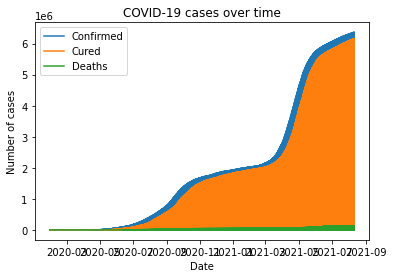

In [40]:
plt.plot(codf['Date'], codf['Confirmed'], label='Confirmed')
plt.plot(codf['Date'], codf['Cured'], label='Cured')
plt.plot(codf['Date'], codf['Deaths'], label='Deaths')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title('COVID-19 cases over time')
plt.legend()
plt.show()

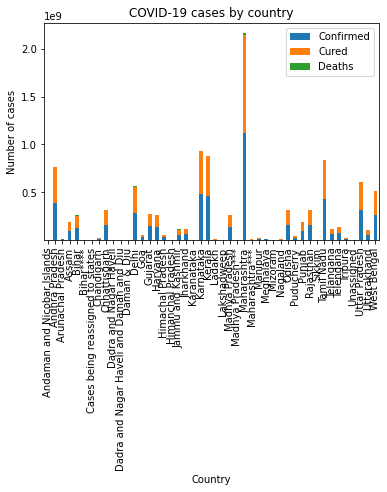

In [42]:
codf.groupby('State/UnionTerritory')[['Confirmed', 'Cured', 'Deaths']].sum().plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Number of cases')
plt.title('COVID-19 cases by country')
plt.show()

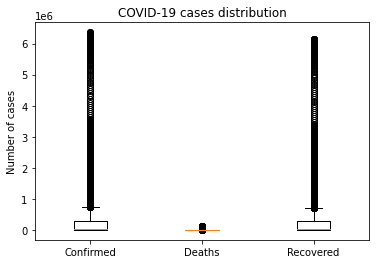

In [44]:
plt.boxplot([
    codf['Confirmed'],
    codf['Deaths'],
    codf['Cured']
])
plt.xticks([1, 2, 3], ['Confirmed', 'Deaths', 'Recovered'])
plt.ylabel('Number of cases')
plt.title('COVID-19 cases distribution')
plt.show()


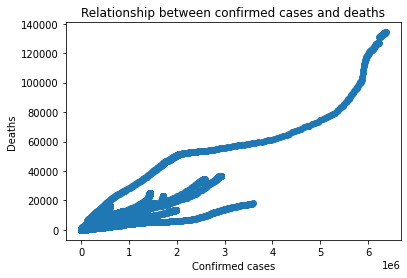

In [46]:
plt.scatter(codf['Confirmed'], codf['Deaths'])
plt.xlabel('Confirmed cases')
plt.ylabel('Deaths')
plt.title('Relationship between confirmed cases and deaths')
plt.show()

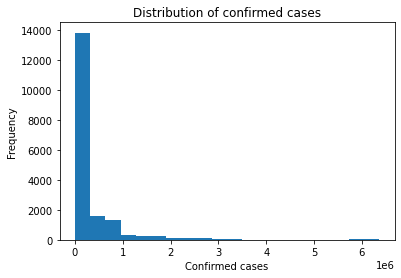

In [47]:
plt.hist(codf['Confirmed'], bins=20)
plt.xlabel('Confirmed cases')
plt.ylabel('Frequency')
plt.title('Distribution of confirmed cases')
plt.show()

ValueError: There must be exactly two hue levels to use `split`.'